# Reflection and Transmission

**Scott Prahl**

**May 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import iadpython.sphere
%config InlineBackend.figure_format='retina'

## Reflection

The idea is to subtract background and normalize by reflectance from a reference standard.
Let $P$ be the detected signal then the measurement used by the inverse adding-doubling program is $M_R$

$$
M_R = r_\mathrm{standard} \cdot \frac{P_\mathrm{sample} - P_\mathrm{background}}{P_\mathrm{standard} - P_\mathrm{background}}
$$

<center>
    <img src="sphereMR.png" width="80%" />
</center>

In this scenario, the baffle remains between the sample (or standard) and the detector.

### Difference between $M_R$ and true reflectance

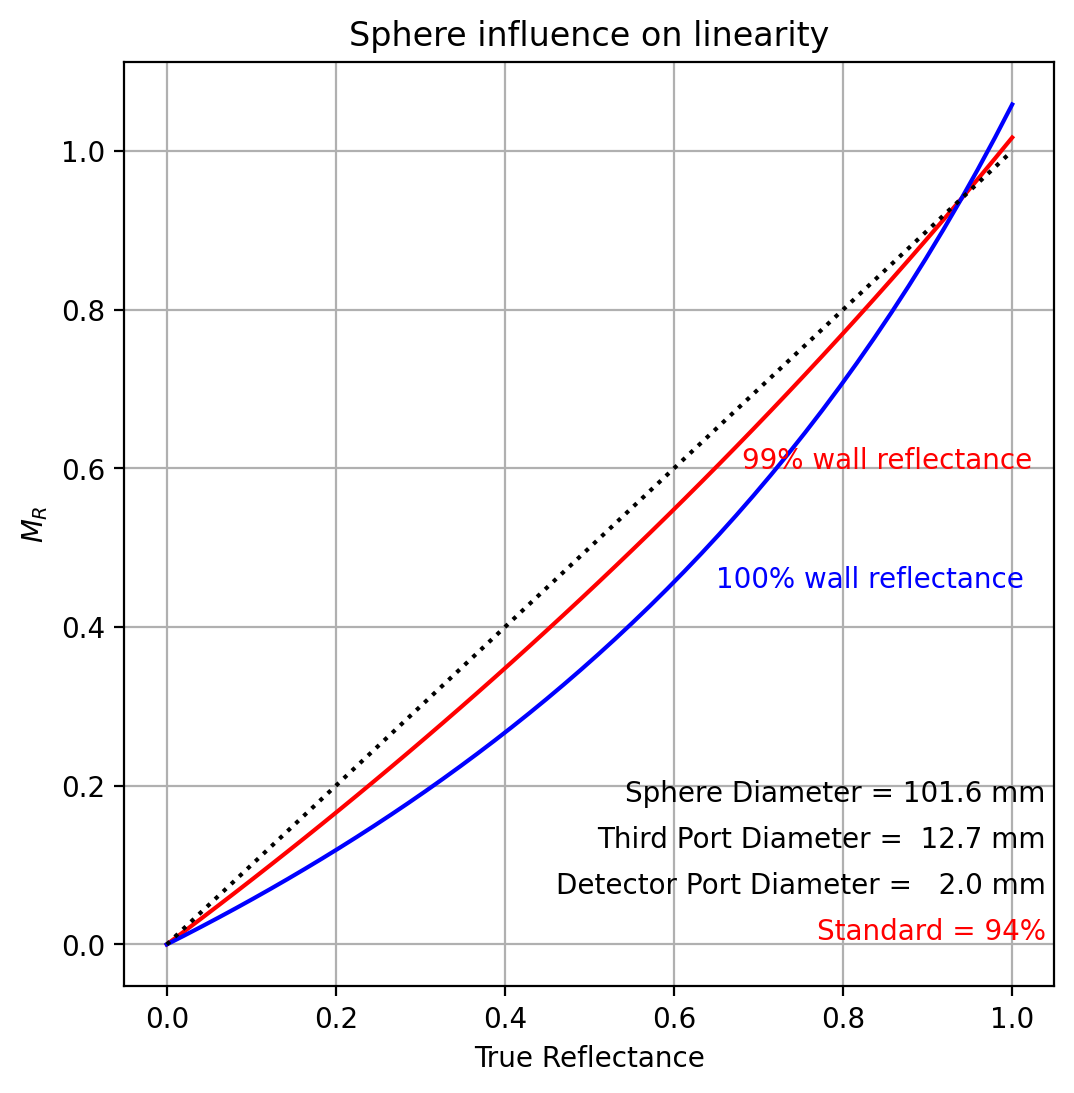

In [9]:
r_sample = np.linspace(0.0,1,50)
d_sphere = 25.4*4 #mm
d_sample = 25.4/2

s = iadpython.Sphere(d_sphere, d_sample, d_third=25.4/2, d_detector=2)
r_standard = 0.94
s.r_std = r_standard
s.r_third = r_standard

plt.figure(figsize=(6,6))
s.r_wall=0.99
MR = s.MR(r_sample)
plt.plot(r_sample, MR, color='red')
plt.text(0.68,0.60,'%g%% wall reflectance'%(100*s.r_wall), color='red', ha='left')

s.r_wall=1.00
MR = s.MR(r_sample)
plt.plot(r_sample, MR, color='blue')
plt.text(0.65,0.45,'%g%% wall reflectance'%(100*s.r_wall), color='blue', ha='left')

plt.plot([0,1],[0,1],':k')

plt.xlabel('True Reflectance')
plt.ylabel('$M_R$')
plt.title('Sphere influence on linearity')
plt.text(1,0.20,"Sphere Diameter = %5.1f mm "%s.d, ha='right', transform=plt.gca().transAxes)
plt.text(1,0.15,"Third Port Diameter = %5.1f mm "%(s.third.d), ha='right',transform=plt.gca().transAxes)
plt.text(1,0.10,"Detector Port Diameter = %5.1f mm "%(s.detector.d), ha='right',transform=plt.gca().transAxes)
plt.text(1,0.05,"Standard = %g%% "%(100*r_standard), ha='right',transform=plt.gca().transAxes,color='red')
plt.grid()
plt.show()

## Transmission

The idea is to subtract background and normalize by reflectance from a reference standard.  Again
$P$ is the detected signal

$$
M_T = r_\mathrm{standard} \cdot \frac{P_\mathrm{sample} - P_\mathrm{background}}{P_\mathrm{standard} - P_\mathrm{background}}
$$

<center>
    <img src="sphereMT.png" width="80%" />
</center>

In this measurement the baffle is no longer between the standard and the reflector.

<center>
    <img src="sphereMT2.png" width="80%" />
</center>

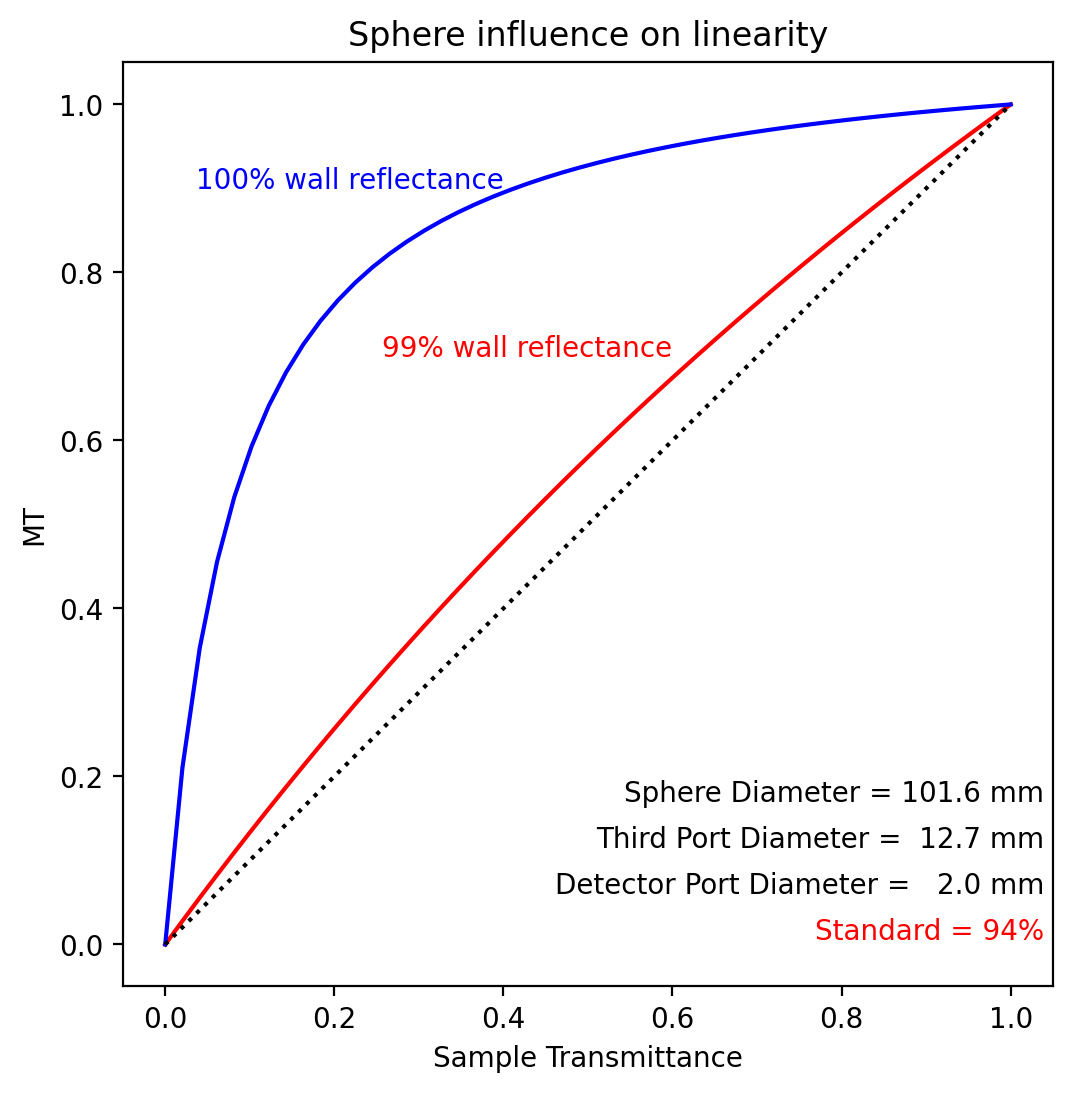

In [33]:
t_sample = np.linspace(0.0,1,50)
r_sample = 1- t_sample
d_sphere = 25.4*4 #mm
d_sample = 25.4/2

s = iadpython.Sphere(d_sphere, d_sample, d_third=25.4/2, d_detector=2)
r_standard = 0.94
s.r_std = r_standard
s.r_third = r_standard

plt.figure(figsize=(6,6))
s.r_wall=0.99
MT = s.MT(t_sample, 1-t_sample)
plt.plot(t_sample, MT, color='red')
plt.text(0.6,0.70,'%g%% wall reflectance'%(100*s.r_wall), color='red', ha='right')

s.r_wall=1.00
MT = s.MT(t_sample, 1-t_sample)
plt.plot(t_sample, MT, color='blue')
plt.text(0.4,0.9,'%g%% wall reflectance'%(100*s.r_wall), color='blue', ha='right')

plt.plot([0,1],[0,1],':k')

plt.xlabel('Sample Transmittance')
plt.ylabel('MT')
plt.title('Sphere influence on linearity')
plt.text(1,0.20,"Sphere Diameter = %5.1f mm "%s.d, ha='right', transform=plt.gca().transAxes)
plt.text(1,0.15,"Third Port Diameter = %5.1f mm "%(s.third.d), ha='right',transform=plt.gca().transAxes)
plt.text(1,0.10,"Detector Port Diameter = %5.1f mm "%(s.detector.d), ha='right',transform=plt.gca().transAxes)
plt.text(1,0.05,"Standard = %g%% "%(100*r_standard), ha='right',transform=plt.gca().transAxes,color='red')
plt.show()

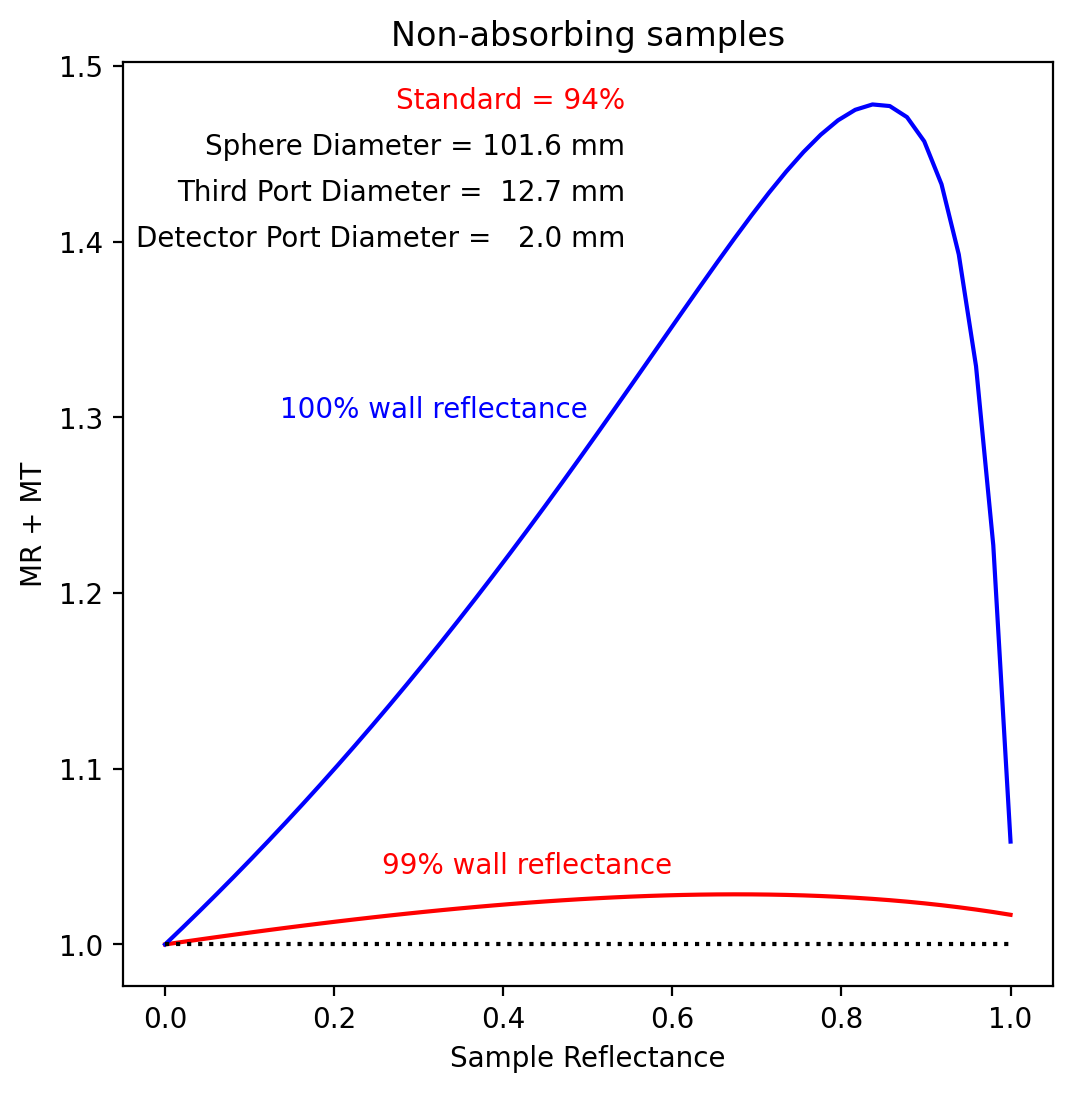

In [34]:
t_sample = np.linspace(0.0,1,50)
r_sample = 1-t_sample
d_sphere = 25.4*4 #mm
d_sample = 25.4/2

s = iadpython.Sphere(d_sphere, d_sample, d_third=25.4/2, d_detector=2)
r_standard = 0.94
s.r_std = r_standard
s.r_third = r_standard

plt.figure(figsize=(6,6))
s.r_wall=0.99
MT = s.MT(t_sample, r_sample)
MR = s.MR(r_sample)

plt.plot(r_sample, MR+MT, color='red')
plt.text(0.6,1.04,'%g%% wall reflectance'%(100*s.r_wall), color='red', ha='right')

s.r_wall=1.00
MT = s.MT(t_sample, r_sample)
MR = s.MR(r_sample)
plt.plot(r_sample, MR+MT, color='blue')
plt.text(0.5,1.3,'%g%% wall reflectance'%(100*s.r_wall), color='blue', ha='right')

plt.plot([0,1],[1,1],':k')

plt.xlabel('Sample Reflectance')
plt.ylabel('MR + MT')
plt.title('Non-absorbing samples')
plt.text(0.55,0.90,"Sphere Diameter = %5.1f mm "%s.d, ha='right', transform=plt.gca().transAxes)
plt.text(0.55,0.85,"Third Port Diameter = %5.1f mm "%(s.third.d), ha='right',transform=plt.gca().transAxes)
plt.text(0.55,0.80,"Detector Port Diameter = %5.1f mm "%(s.detector.d), ha='right',transform=plt.gca().transAxes)
plt.text(0.55,0.95,"Standard = %g%% "%(100*r_standard), ha='right',transform=plt.gca().transAxes,color='red')
plt.show()

## Measuring wall reflectivity

Consider the following experiment

<center>
    <img src="sphere-wall.png" width="60%" />
</center>

Since the baffle prevents the initial reflection from the sphere wall from reaching the detector.  Thus the diffuse light in the sphere will be $P = r_w \cdot (1-a_e) r_w P_0$. The normalized optical power falling on the detector port will be

$$
P_d^\mathrm{nothing} = a_d (1-a_e) r_w G_\text{baffle}(0) \cdot  r_w P_0
$$

$$
P_d^\mathrm{standard} = a_d (1-a_e) r_w G_\text{baffle}(r_\mathrm{standard}) \cdot  r_w P_0
$$

If $\gamma$ is defined as

$$
\gamma = \frac{P_d^\mathrm{standard}}{P_d^\mathrm{standard}-P_d^\mathrm{nothing}}
$$

then the wall reflectivity is

$$
r_w  = \frac{1}{a_w + (1-a_e)(a_d r_d + a_s r_\mathrm{std}\gamma )}
$$

In [5]:
def gain(a_s, rs, ad, rd, ae, rw):
    aw = 1- ae - ad - a_s
    denom = 1-rw*aw - rw*(1-ae)*(ad*rd + a_s*rs)
    return 1/denom

def rww(a_s,rs,ad,rd,ae, gamma):
    aw = 1- ae - ad - a_s
    denom = aw + (1-ae)*(ad*rd + a_s*rs*gamma)
    return 1/denom

d = 100
ds = 10
de = 20
dd = 5
A = 4*np.pi*(d/2)**2
ae = np.pi*(de/2)**2 / A
ad = np.pi*(dd/2)**2 / A
a_s = np.pi*(ds/2)**2 / A
rd = 0.2
rstd = 0.99
rw = 0.95

p_high = gain(a_s,rstd,ad,rd,ae,rw)
p_low = gain(a_s,0,ad,rd,ae,rw)

print("P_high = %8.3f" % p_high)
print("P_low  = %8.3f" % p_low)

eta=p_high/p_low

print("eta=%8.5f" % eta)

gamma = p_high/(p_high-p_low)

print("gamma=%8.5f" % gamma)
print("gamma=%8.5f"% (eta/(eta-1)))

RW = rww(a_s, rstd, ad, rd, ae, gamma)
print(RW)

P_high =   16.660
P_low  =   16.038
eta= 1.03878
gamma=26.78618
gamma=26.78618
0.9499999999999998
